In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Explore Data

In [2]:
train_data = pd.read_csv('train.csv')
unique_m_data = pd.read_csv('unique_m.csv')


In [35]:
unique_ct=train_data['critical_temp'].unique()
print(len(unique_ct),train_data['critical_temp'].count())


3007 21263


## Step 2: Data Integration


Merge data based on a common identifier, e.g., 'chemical_formula'

In [3]:
#create set of unique column name for both datasets
columns_set1 = set(train_data.columns)
columns_set2 = set(unique_m_data.columns)

#Find the common column by taking the intersection of the sets
common_columns=columns_set1.intersection(columns_set2)

# Print the common column names
print("Common Columns:")
for column in common_columns:
    print(column)


Common Columns:
critical_temp


In [4]:
# Merge data based on a common identifier, e.g., 'chemical_formula'
merged_data = pd.merge(train_data, unique_m_data, on='critical_temp', how='inner')

In [5]:
# Check for missing values and handle them if needed
missing_values = merged_data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


# Step 3: Data Splitting

In [6]:
print(merged_data.columns)

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass',
       ...
       'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'material'],
      dtype='object', length=169)


In [8]:
X = merged_data.iloc[:, :-2]  # Features (excluding critical_temperature and chemical_formula)
y = merged_data['critical_temp']  # Target (critical temperature)

In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=43)

# Step 4: Model Selection (Linear Regression)

In [27]:
model = LinearRegression()

# Step 5: Model Training

In [28]:
model.fit(X_train,y_train)

LinearRegression()

# Step 6: Model Evaluation (Validation Set)

In [29]:
y_pred_val=model.predict(X_val)

mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)

print("Validation MAE:", mae_val)
print("Validation MSE:", mse_val)
print("Validation RMSE:", rmse_val)
print("Validation R-squared:", r2_val)


Validation MAE: 1.1171776979214861e-12
Validation MSE: 2.469872037218574e-24
Validation RMSE: 1.5715826536388642e-12
Validation R-squared: 1.0


# Step 7: Final Evaluation (Test Set)

In [30]:
y_pred_test = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest MAE:", mae_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R-squared:", r2_test)



Test MAE: 1.112828956493324e-12
Test MSE: 2.4511631056370582e-24
Test RMSE: 1.5656190806313834e-12
Test R-squared: 1.0


# Step 8: Interpretation (Feature Importance)

In [31]:
# Get the coefficients (importance) of each feature in the model
feature_importance = model.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
feature_names = X.columns  # Assuming X is your feature DataFrame
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
sorted_coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the top N most important features
top_n = 10  # You can change this to the desired number of top features to display
print(f"Top {top_n} Most Important Features:")
print(sorted_coefficients_df.head(top_n))

Top 10 Most Important Features:
                      Feature   Coefficient  Abs_Coefficient
81              critical_temp  1.000000e+00     1.000000e+00
15                entropy_fie  5.720424e-12     5.720424e-12
25      entropy_atomic_radius -5.107220e-12     5.107220e-12
16            wtd_entropy_fie  2.059131e-12     2.059131e-12
26  wtd_entropy_atomic_radius  1.632250e-12     1.632250e-12
75            entropy_Valence  1.631452e-12     1.631452e-12
5         entropy_atomic_mass -1.527717e-12     1.527717e-12
0          number_of_elements -1.297522e-12     1.297522e-12
74          wtd_gmean_Valence -1.081790e-12     1.081790e-12
76        wtd_entropy_Valence -9.909677e-13     9.909677e-13


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_2840\322760014.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(sorted_coefficients_df['Feature'][:top_n], sorted_coefficients_df['Coefficient'][:top_n])


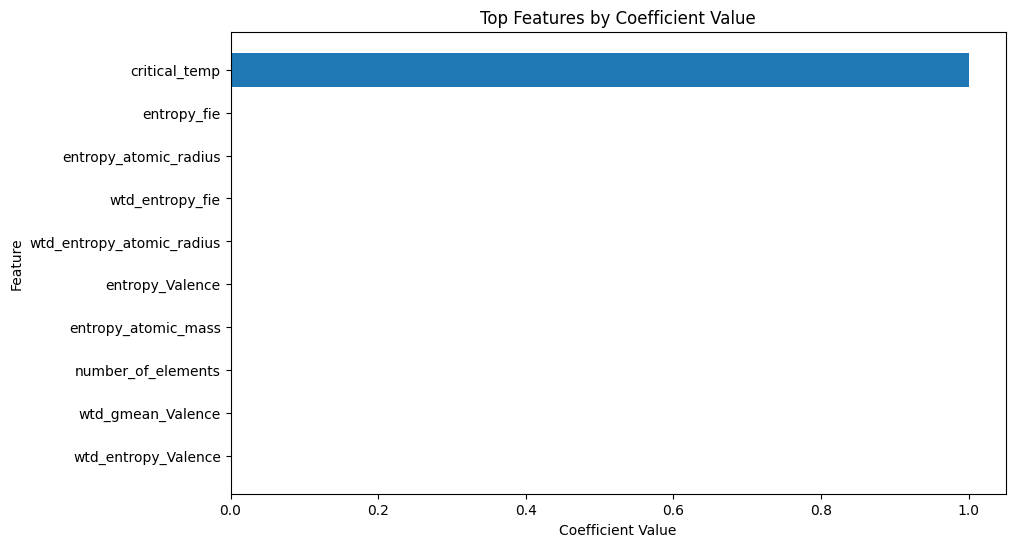

In [32]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients_df['Feature'][:top_n], sorted_coefficients_df['Coefficient'][:top_n])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Value')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization of top features
plt.show()

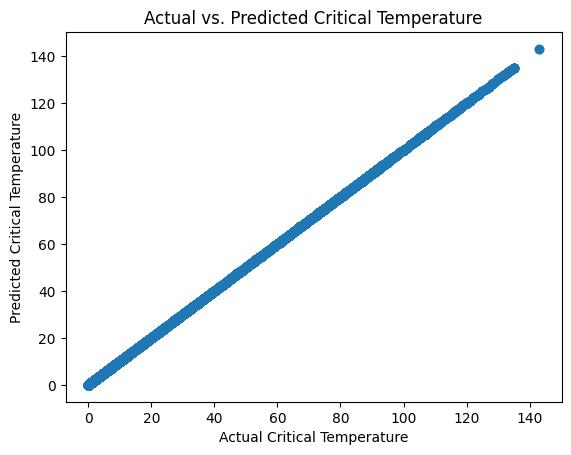

In [33]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Critical Temperature")
plt.ylabel("Predicted Critical Temperature")
plt.title("Actual vs. Predicted Critical Temperature")
plt.show()